In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = pd.read_csv("C:\\Users\\Ishaan Verma\\Downloads\\train_log.csv")
test_data = pd.read_csv("C:\\Users\\Ishaan Verma\\Downloads\\test_log.csv")

X_train = train_data.drop('Survived', axis = 1).drop('Name', axis = 1)
X_train = X_train.replace("male",1).replace("female",0).values.T

y_train = np.zeros(train_data.shape[0])
y_train = train_data.Survived.values.reshape(1,y_train.shape[0])

X_test = test_data.drop('Survived', axis = 1).drop('Name', axis = 1)
X_test = X_test.replace("male",1).replace("female",0).values.T
y_test = np.zeros(test_data.shape[0])
y_test = test_data.Survived.values.reshape(1,y_test.shape[0])

C:\Users\Ishaan Verma\AppData\Local\Temp\ipykernel_22876\1483212011.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.replace("male",1).replace("female",0).values.T
C:\Users\Ishaan Verma\AppData\Local\Temp\ipykernel_22876\1483212011.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = X_test.replace("male",1).replace("female",0).values.T


In [3]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [4]:
def model(X, Y, learning_rate, iterations):    
    m = X_train.shape[1]
    n = X_train.shape[0]    
    W = np.zeros((n,1))
    B = 0   
    cost_list = []    
    for i in range(iterations):        
        Z = np.dot(W.T, X) + B 
        A = sigmoid(Z)  #predictions
        cost = -(1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
        dW = (1/m)*np.dot(A-Y, X.T) 
        dB = (1/m)*np.sum(A - Y)        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        cost_list.append(cost)        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost) 
    return W, B, cost_list

In [15]:
iterations = 100000
learning_rate = 0.003
W, B, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.5071784181068166
cost after  20000 iteration is :  0.4909525495311024
cost after  30000 iteration is :  0.48325602767457665
cost after  40000 iteration is :  0.47773463614466743
cost after  50000 iteration is :  0.47350104719505437
cost after  60000 iteration is :  0.4702160466057049
cost after  70000 iteration is :  0.46765370629789715
cost after  80000 iteration is :  0.46564606393200986
cost after  90000 iteration is :  0.46406631209235166


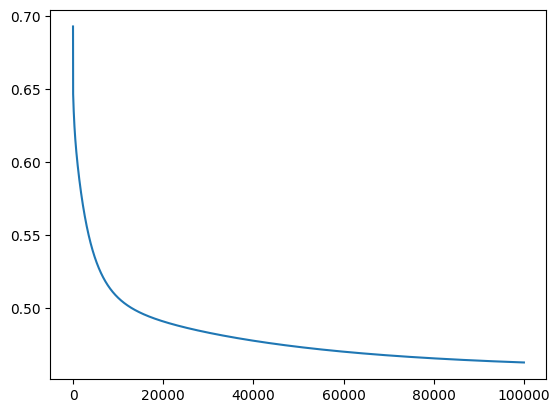

In [16]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [17]:
def accuracy(X, Y, W, B):    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)    
    A = A > 0.5  
    A = np.array(A, dtype = 'int64')   
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [18]:
accuracy(X_test, y_test, W, B)

Accuracy of the model is :  80.0 %
